# Heart Failure Prediction

```
Made by Aziz Dharmawan Apray
```

## Description

Project ini dibuat untuk mengaplikasikan model prediksi menggunakan **Ensembel model, Random Forest**. Dataset yang digunakan dalam project kali ini mengenai **Heart Failure Prediction** yang didapat dari [Kaggle](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data).

Berikut ini merupakan deskripsi lengkap mengenai kolom-kolom pada dataset
| Columns | Description |
| --- | --- |
| age | Age |
| anemia | Decrease of red blood cells or hemoglobin *(boolean)* |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood *(mcg/L)* |
| diabetes | If the patient has diabetes *(boolean)* |
| ejection_fraction | Percentage of blood leaving the heart at each contraction *(%)* |
| high_blood_pressure | If the patient has hypertension *(boolean)* |
| platelets | Platelets in the blood *(kiloplatelets/mL)* |
| serum_creatinine | Level of serum creatinine in the blood *(mg/dL)* |
| serum_sodium | Level of serum sodium in the blood *(mEq/L)* |
| sex | Woman or man *(binary)* |
| smoking | If the patient smokes or not *(boolean)* |
| time | Follow-up period *(days)* |
| DEATH_EVENT | If the patient deceased during the follow-up period *(boolean)* |

## Working Area

### 1 - Import Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 2 - Data Loading

In [26]:
# Load data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df_ori = df.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [27]:
# Check the dataset shapes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
# Check Descriptive Statistics of dataset
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [29]:
# Change the age type from float to integer
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


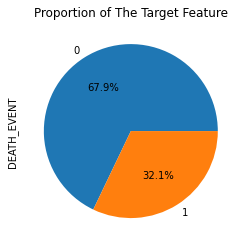

In [30]:
# Check value proportion on target feature
df['DEATH_EVENT'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of The Target Feature')
plt.show()

The target feature is **imbalance**

0 = No

1 = Yes

### 3 - EDA

Is age and gender an indicator to death event?

(array([ 8.,  8., 21.,  4.,  6., 27.,  9., 12., 18., 12., 39.,  4., 13.,
        29.,  4.,  8., 25.,  7.,  4., 11.,  4.,  8.,  4.,  0.,  6.,  2.,
         0.,  3.,  0.,  3.]),
 array([40.        , 41.83333333, 43.66666667, 45.5       , 47.33333333,
        49.16666667, 51.        , 52.83333333, 54.66666667, 56.5       ,
        58.33333333, 60.16666667, 62.        , 63.83333333, 65.66666667,
        67.5       , 69.33333333, 71.16666667, 73.        , 74.83333333,
        76.66666667, 78.5       , 80.33333333, 82.16666667, 84.        ,
        85.83333333, 87.66666667, 89.5       , 91.33333333, 93.16666667,
        95.        ]),
 <BarContainer object of 30 artists>)

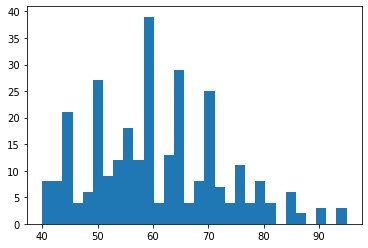

In [31]:
plt.hist(x=df['age'],bins=30)

<AxesSubplot:ylabel='Frequency'>

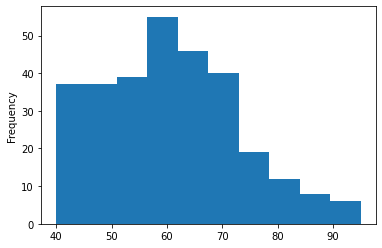

In [32]:
df['age'].plot(kind='hist')

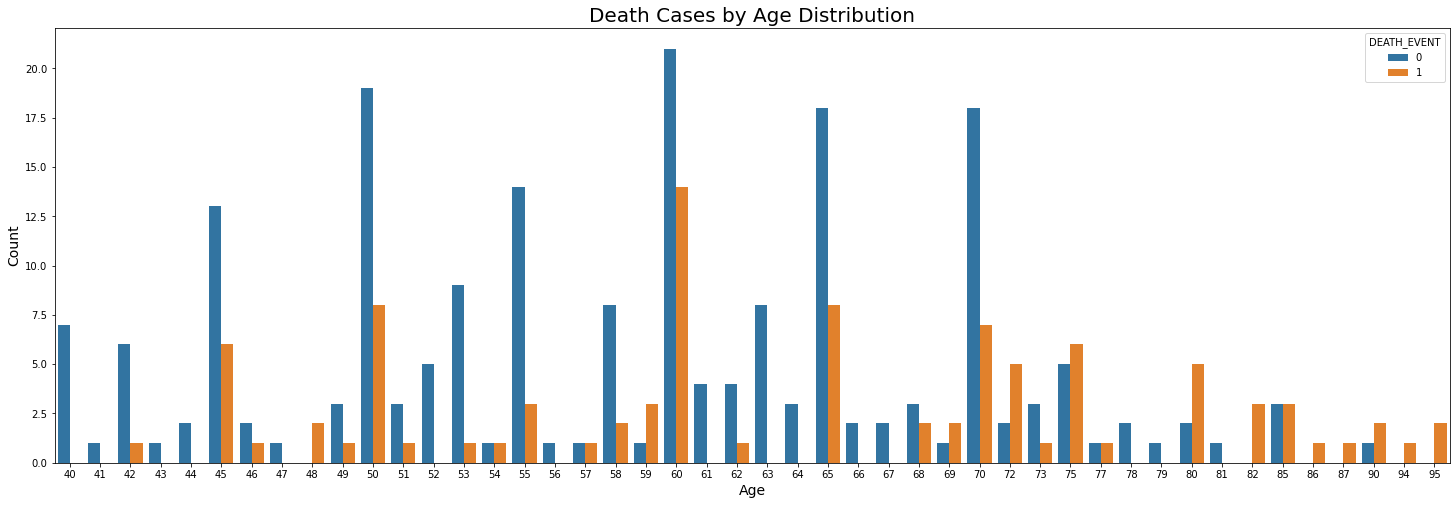

In [33]:
plt.figure(figsize=(25,8))
sns.countplot(data=df, x='age', hue='DEATH_EVENT')
plt.title('Death Cases by Age Distribution', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

- people in the age of 40 and higher has bigger chance to diagnose has a CVDs
- death cases getting higher when people who has CVDs in the age of 45
- the highest death cases happen to people who has Cardiovascular diseases (CVDs) are in the age of 60.

C:\Users\ACER\AppData\Local\Temp/ipykernel_16572/1922239073.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_survive = male[df["DEATH_EVENT"]==0]
C:\Users\ACER\AppData\Local\Temp/ipykernel_16572/1922239073.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_not = male[df["DEATH_EVENT"]==1]
C:\Users\ACER\AppData\Local\Temp/ipykernel_16572/1922239073.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_survive = female[df["DEATH_EVENT"]==0]
C:\Users\ACER\AppData\Local\Temp/ipykernel_16572/1922239073.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_not = female[df["DEATH_EVENT"]==1]


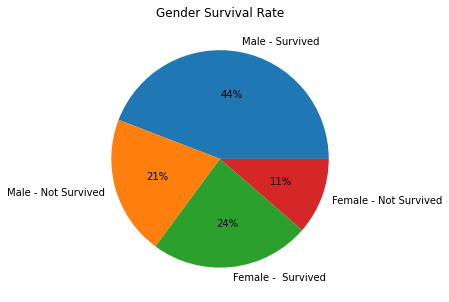

In [44]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survive = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survive = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male_survive), len(male_not), len(female_survive), len(female_not)]

plt.figure(figsize=(5,5))
plt.pie(x=values, labels=labels, autopct='%1.0f%%')
plt.title('Gender Survival Rate')
plt.show()

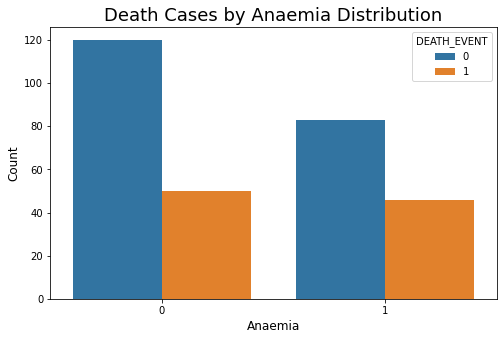

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.title('Death Cases by Anaemia Distribution', fontsize=18)
plt.xlabel('Anaemia', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

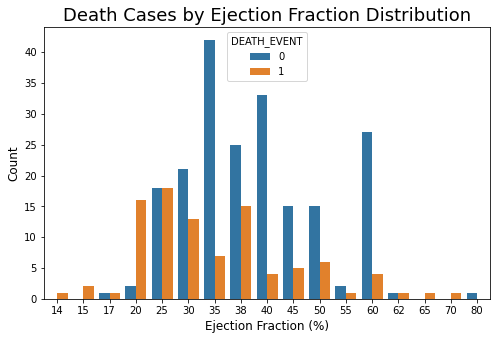

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ejection_fraction', hue='DEATH_EVENT')
plt.title('Death Cases by Ejection Fraction Distribution', fontsize=18)
plt.xlabel('Ejection Fraction (%)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The lower ejection fraction means the function of the hearth more worst and the death cases become more higher when ejection fraction is low.

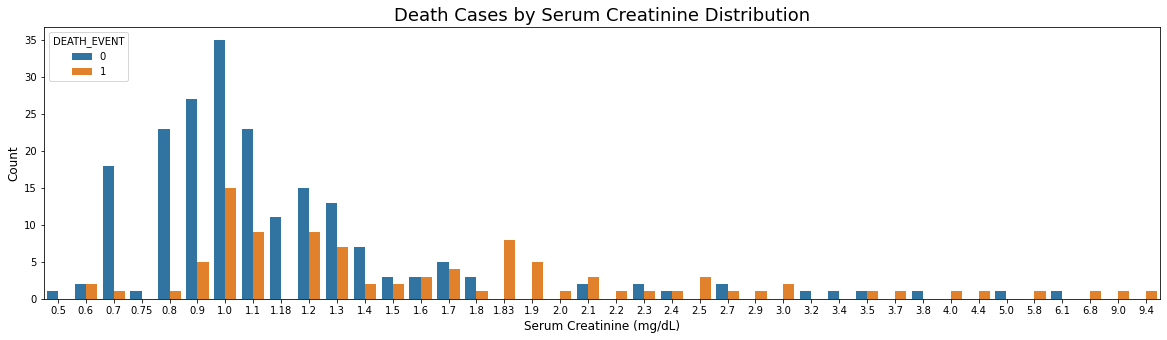

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='serum_creatinine', hue='DEATH_EVENT')
plt.title('Death Cases by Serum Creatinine Distribution', fontsize=18)
plt.xlabel('Serum Creatinine (mg/dL)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Higher serum ceratinine means the function of the kidney more worst

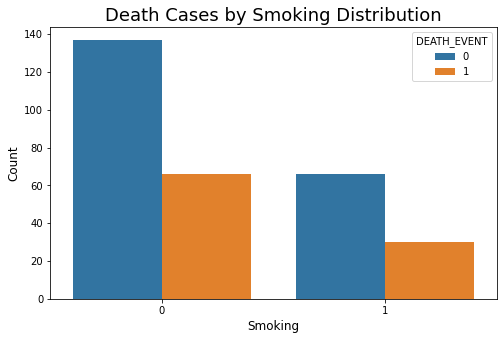

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.title('Death Cases by Smoking Distribution', fontsize=18)
plt.xlabel('Smoking', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

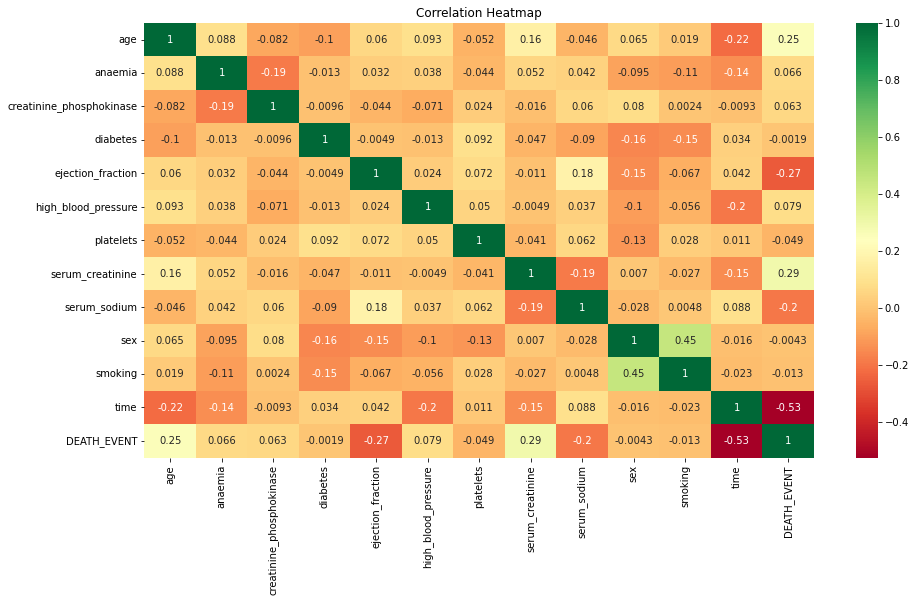

In [11]:
# Correlation

plt.figure(figsize=(15,8))
heatmap = sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
heatmap.set_title('Correlation Heatmap')

plt.show()

In [12]:
# Correlation value to `Death_Event`
df.corr()['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

### 4 - Data Preprocessing

#### 4.1 - Data Inference

In [13]:
# Get data for model inference
df_inf = df.sample(10, random_state=0)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
206,40.000,1,101,0,40,0,226000.00,0.8,141,0,0,187,0
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
12,45.000,1,981,0,30,0,136000.00,1.1,137,1,0,11,1
219,55.000,0,582,1,35,1,371000.00,0.7,140,0,0,197,0
237,70.000,0,232,0,30,0,173000.00,1.2,132,1,0,210,0
136,65.000,1,59,1,60,0,172000.00,0.9,137,0,0,107,0
228,65.000,0,56,0,25,0,237000.00,5.0,130,0,0,207,0
205,50.000,1,167,1,45,0,362000.00,1.0,136,0,0,187,0
52,60.000,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
108,63.000,0,936,0,38,0,304000.00,1.1,133,1,1,88,0


In [14]:
# Remove inference-set from dataset
df_train_test = df.drop(df_inf.index)
df_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
# Reset index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

#### 4.2 - Splitting Dataset

In [16]:
# Define `X` and `y`
X = df_train_test.drop(['DEATH_EVENT'], axis=1)
y = df_train_test['DEATH_EVENT']

print('X shape :', X.shape)
print('y shape :', y.shape)

X shape : (289, 12)
y shape : (289,)


In [17]:
# Split Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0, stratify=y)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (187, 12)
y_train shape: (187,)

X_test shape: (102, 12)
y_test shape: (102,)


#### 4.3 - Check Distribution

In [18]:
# Distribution check
X_train_skewness = pd.DataFrame(X_train.skew(axis=0), columns=['skewness_value']).reset_index()
X_train_skewness.rename(columns={'index': 'column'}, inplace=True)
X_train_skewness['distribution'] = np.where(
    (X_train_skewness['skewness_value'] < 0.5) &
    (X_train_skewness['skewness_value'] > -0.5), 'normal','skewed')

X_train_skewness

,column,skewness_value,distribution
0,age,0.411849,normal
1,anaemia,0.338927,normal
2,creatinine_phosphokinase,4.308967,skewed
3,diabetes,0.271988,normal
4,ejection_fraction,0.399231,normal
5,high_blood_pressure,0.773754,skewed
6,platelets,1.487775,skewed
7,serum_creatinine,2.088338,skewed
8,serum_sodium,-1.395240,skewed
9,sex,-0.911020,skewed


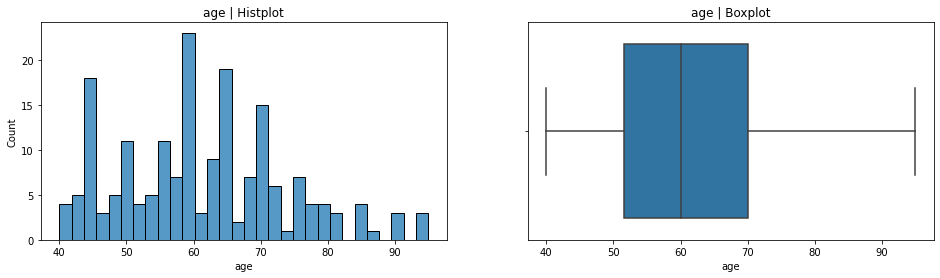

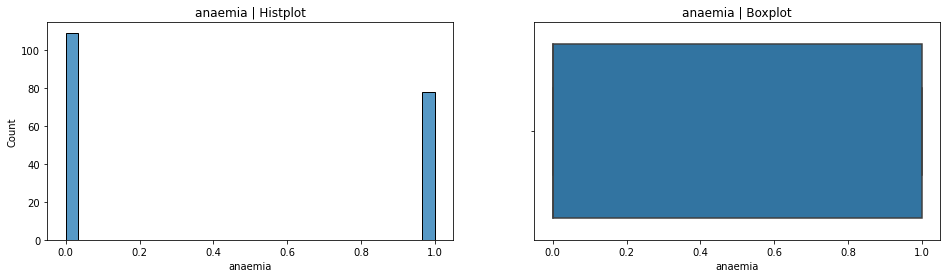

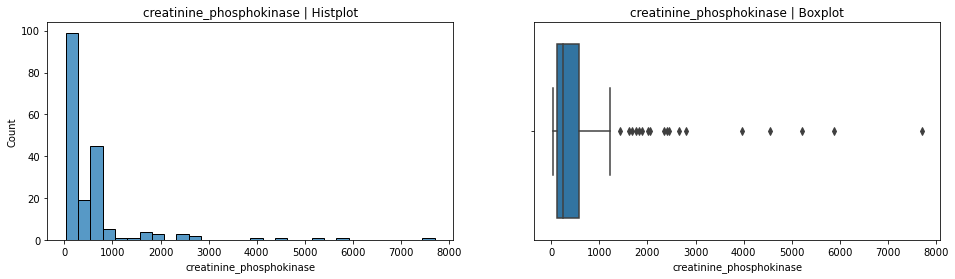

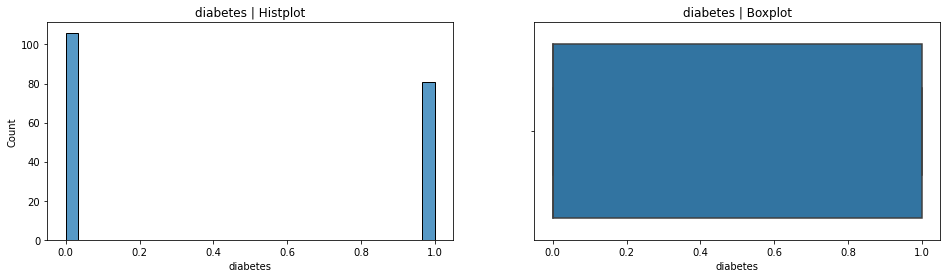

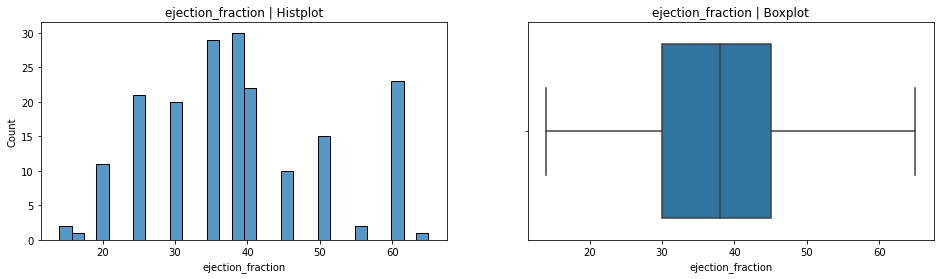

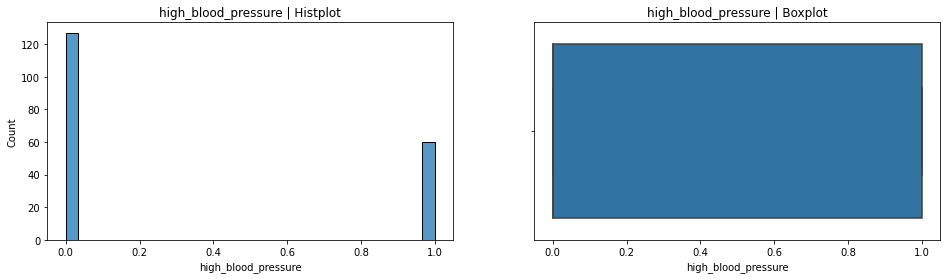

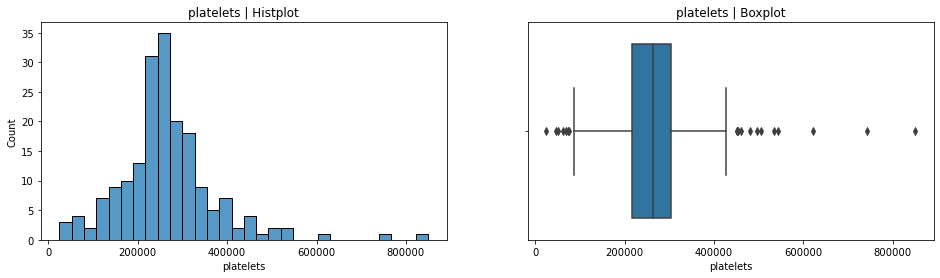

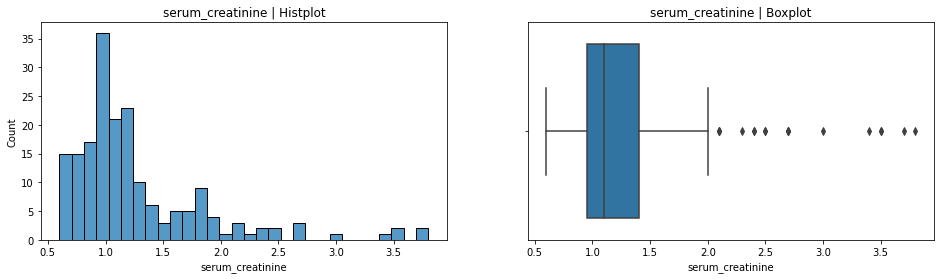

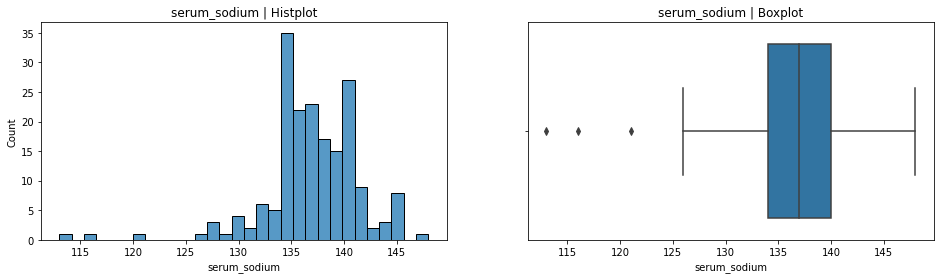

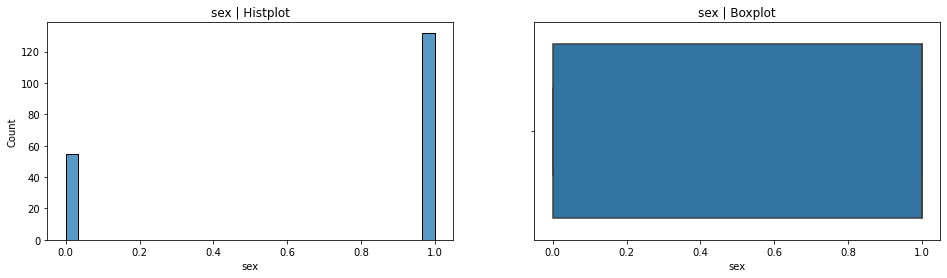

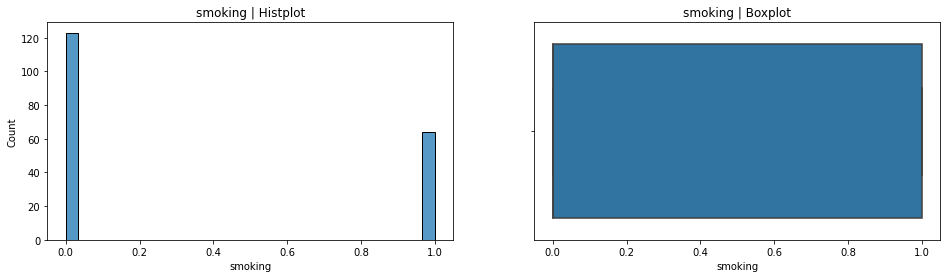

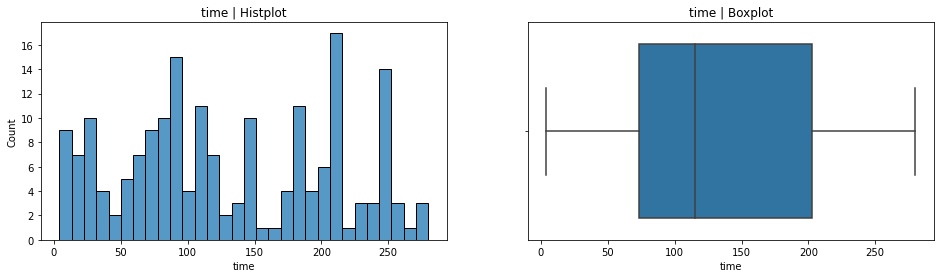

In [19]:
# Visualization of column `distribution`
for col in X_train:
    fig, ax = plt.subplots(1, 2, figsize=(16,4))

    sns.histplot(x=X_train[col], ax=ax[0], bins=30)
    sns.boxplot(x=X_train[col], ax=ax[1])
    
    ax[0].set_title(col + ' | Histplot')
    ax[1].set_title(col + ' | Boxplot')

    plt.show()

#### 4.4 - Check Outliers

##### Function to get Upper & Lower Boundary

In [20]:
# Function to get lower and upper boundaries of `normal` distribution data
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

# Function to get lower and upper boundaries of `skew` distribution data
def find_skewed_boundaries(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

##### Get Upper & Lower Boundary

In [21]:
# Prepare the empty column with the empty list
X_train_outlier = {
    'column':[],
    'upper_boundary':[],
    'lower_boundary':[],
    'total_right_tail':[],
    'total_left_tail':[],
    'total_right_tail_percent':[],
    'total_left_tail_percent':[],
    'total_outlier':[],
    'total_outlier_percent':[]
}

# Get upper and lower boundary from each column 
for row in X_train_skewness.index.tolist():
    col = X_train_skewness.iloc[row]['column']
    dist = X_train_skewness.iloc[row]['distribution']
    if dist == 'normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, col)
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, col)
    
    total_right_tail = len(X_train[X_train[col] > upper_boundary])
    total_left_tail = len(X_train[X_train[col] < lower_boundary])
    total_right_tail_percent = total_right_tail / len(X_train) * 100
    total_left_tail_percent = total_left_tail / len(X_train) * 100
    total_outlier = total_right_tail + total_left_tail
    total_outlier_percent = total_right_tail_percent + total_left_tail_percent

    X_train_outlier['column'].append(col)
    X_train_outlier['upper_boundary'].append(upper_boundary)
    X_train_outlier['lower_boundary'].append(lower_boundary)
    X_train_outlier['total_right_tail'].append(total_right_tail)
    X_train_outlier['total_left_tail'].append(total_left_tail)
    X_train_outlier['total_right_tail_percent'].append(total_right_tail_percent)
    X_train_outlier['total_left_tail_percent'].append(total_left_tail_percent)
    X_train_outlier['total_outlier'].append(total_outlier)
    X_train_outlier['total_outlier_percent'].append(total_outlier_percent)

# Convert to Dataframe
X_train_outlier = pd.DataFrame(X_train_outlier)
X_train_outlier

,column,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,age,98.899821,24.052051,0,0,0.000000,0.000000,0,0.000000
1,anaemia,1.900329,-1.066104,0,0,0.000000,0.000000,0,0.000000
2,creatinine_phosphokinase,1277.250000,-576.750000,18,0,9.625668,0.000000,18,9.625668
3,diabetes,1.923681,-1.057370,0,0,0.000000,0.000000,0,0.000000
4,ejection_fraction,73.421976,3.380163,0,0,0.000000,0.000000,0,0.000000
5,high_blood_pressure,2.500000,-1.500000,0,0,0.000000,0.000000,0,0.000000
6,platelets,436500.000000,84500.000000,12,7,6.417112,3.743316,19,10.160428
7,serum_creatinine,2.075000,0.275000,17,0,9.090909,0.000000,17,9.090909
8,serum_sodium,149.000000,125.000000,0,3,0.000000,1.604278,3,1.604278
9,sex,2.500000,-1.500000,0,0,0.000000,0.000000,0,0.000000


In [22]:
# Merge `X_train_skewness` and `X_train_outlier`
pd.merge(X_train_skewness, X_train_outlier, on='column')

,column,skewness_value,distribution,upper_boundary,lower_boundary,total_right_tail,total_left_tail,total_right_tail_percent,total_left_tail_percent,total_outlier,total_outlier_percent
0,age,0.411849,normal,98.899821,24.052051,0,0,0.000000,0.000000,0,0.000000
1,anaemia,0.338927,normal,1.900329,-1.066104,0,0,0.000000,0.000000,0,0.000000
2,creatinine_phosphokinase,4.308967,skewed,1277.250000,-576.750000,18,0,9.625668,0.000000,18,9.625668
3,diabetes,0.271988,normal,1.923681,-1.057370,0,0,0.000000,0.000000,0,0.000000
4,ejection_fraction,0.399231,normal,73.421976,3.380163,0,0,0.000000,0.000000,0,0.000000
5,high_blood_pressure,0.773754,skewed,2.500000,-1.500000,0,0,0.000000,0.000000,0,0.000000
6,platelets,1.487775,skewed,436500.000000,84500.000000,12,7,6.417112,3.743316,19,10.160428
7,serum_creatinine,2.088338,skewed,2.075000,0.275000,17,0,9.090909,0.000000,17,9.090909
8,serum_sodium,-1.395240,skewed,149.000000,125.000000,0,3,0.000000,1.604278,3,1.604278
9,sex,-0.911020,skewed,2.500000,-1.500000,0,0,0.000000,0.000000,0,0.000000


##### Handling Outliers

In [23]:
# Outliers < 5% (trimming)
from feature_engine.outliers import OutlierTrimmer

print('X_train - Before Handling :', X_train.shape)

## Skew
trim = OutlierTrimmer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['serum_sodium'],
                        missing_values='ignore'
                        )

## Normal
#trim = OutlierTrimmer(capping_method='gaussian',
#                        tail='both',
#                        fold=3,
#                        variables=[],
#                        missing_values='ignore'
#                        )

# Fit the capper
X_train_trim = trim.fit_transform(X_train)

print('X_train - After Handling :', X_train_trim.shape)

X_train - Before Handling : (187, 12)
X_train - After Handling : (184, 12)


In [24]:
# Outliers 5 % - 15 % (capping)
from feature_engine.outliers import Winsorizer

print('X_train - Before Handling :', X_train_trim.shape)

## Skew
capper = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['creatinine_phosphokinase','platelets','serum_creatinine'],
                        missing_values='ignore'
                        )

## Normal
#capper = Winsorizer       (capping_method='gaussian',
#                        tail='both',
#                        fold=3,
#                        variables=[],
#                        missing_values='ignore'
#                        )

# Fit the capper
X_train_trim_cap = trim.fit_transform(X_train_trim)

print('X_train - After Handling :', X_train_trim_cap.shape)

X_train - Before Handling : (184, 12)
X_train - After Handling : (182, 12)


In [25]:
# Adjust the index for y_train
y_train_trim_cap = y_train.drop(y_train.index.difference(X_train_trim_cap.index))
y_train_trim_cap.shape

(182,)

In [26]:
# Reset Index
X_train_trim_cap.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train_trim_cap.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### 4.5 - Checking Missing Values

In [27]:
# Check how many missing values in X_train
X_train_trim_cap.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [28]:
# Check how many missing values in X_test
X_test.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [29]:
# Check how many missing values in y_train
y_train_trim_cap.isna().sum()

0

In [30]:
# Check how many missing values in y_test
y_test.isna().sum()

0

No missing value detected in Train-set and Test-set

#### 4.6 - Feature Selection

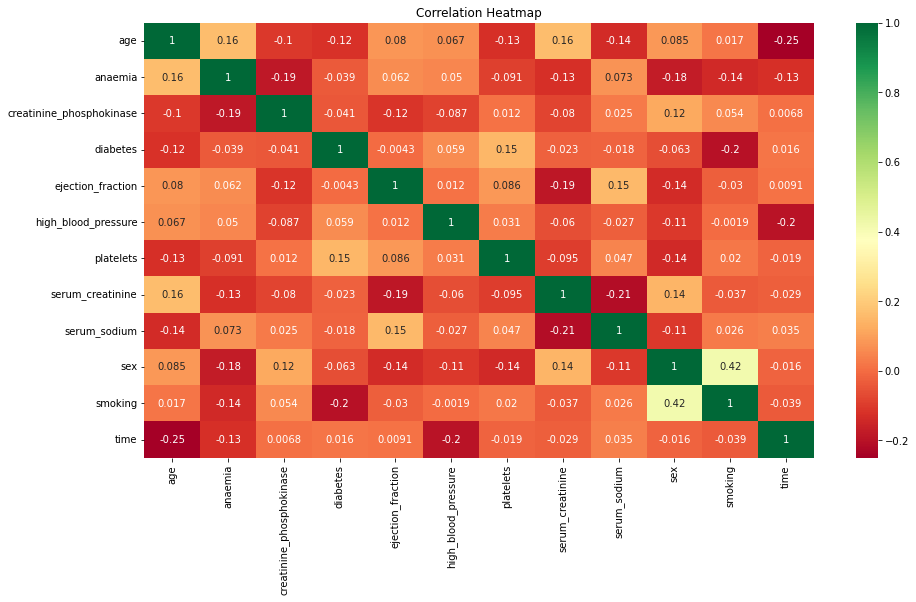

In [31]:
# Feature Selection
plt.figure(figsize=(15,8))
heatmap = sns.heatmap(X_train_trim_cap.corr(), cmap='RdYlGn', annot=True)
heatmap.set_title('Correlation Heatmap')

plt.show()

### 5 - Modelling

In [32]:
# Scikit-learn patch for faster processing
from sklearnex import patch_sklearn
patch_sklearn()

# Preprocess
from sklearn.model_selection import train_test_split

# Model classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Evaluate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


#### 5.1 - Random Forest-Base Model

In [33]:
# Model Definition
rf = RandomForestClassifier(random_state=0)

# Model Training
rf.fit(X_train_trim_cap, y_train_trim_cap)

# Model Prediction
y_pred_train = rf.predict(X_train_trim_cap)
y_pred_test = rf.predict(X_test)

In [34]:
# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(classification_report(y_train_trim_cap, y_pred_train))
print('-'*25, 'Test-Set', '-'*25)
print(classification_report(y_test, y_pred_test))

------------------------- Train-Set -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00        59

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182

------------------------- Test-Set -------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.86      0.76      0.81        33

    accuracy                           0.88       102
   macro avg       0.88      0.85      0.86       102
weighted avg       0.88      0.88      0.88       102



The base model is overfitted because the model can fit the train-set with 100% f1-score and only 92% f1-score in test-set.

#### 5.2 - Random Forest-RandomSearchCV

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [36]:
# Model Training by RandomizedSearchCV
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_param, n_iter=100, cv=5, verbose=3, random_state=0, n_jobs=2)
rf_randomcv.fit(X_train_trim_cap, y_train_trim_cap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=2,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=3)

In [37]:
# RandomizedSearchCV output
print('Best parameters :', rf_randomcv.best_params_)
print('\nBest cross-validation score :', rf_randomcv.best_score_)
print('\nBest estimator :', rf_randomcv.best_estimator_)

Best parameters : {'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'auto', 'max_depth': 780, 'criterion': 'entropy'}

Best cross-validation score : 0.8024024024024025

Best estimator : RandomForestClassifier(criterion='entropy', max_depth=780, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=800, random_state=0)


In [38]:
# Get the best RandomizedSearchCV estimator
best_rf_random = rf_randomcv.best_estimator_

In [39]:
# Predict & Evaluate the best model from RandomizedSearchCV
y_pred = best_rf_random.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[68  1]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        69
           1       0.96      0.79      0.87        33

    accuracy                           0.92       102
   macro avg       0.93      0.89      0.91       102
weighted avg       0.92      0.92      0.92       102



In [40]:
# Create the search grid
grid_param = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(grid_param)

{'criterion': ['entropy'], 'max_depth': [780], 'max_features': ['auto'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [600, 700, 800, 900, 1000]}


In [41]:
# Model Training by GridSearchCV
rf_gridcv = GridSearchCV(estimator=rf, param_grid=grid_param, cv=5, verbose=2,  n_jobs=2)
rf_gridcv.fit(X_train_trim_cap, y_train_trim_cap)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=2,
             param_grid={'criterion': ['entropy'], 'max_depth': [780],
                         'max_features': ['auto'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [600, 700, 800, 900, 1000]},
             verbose=2)

In [42]:
# GridSearchCV output
print('Best parameters :', rf_gridcv.best_params_)
print('\nBest cross-validation score :', rf_gridcv.best_score_)
print('\nBest estimator :', rf_gridcv.best_estimator_)

Best parameters : {'criterion': 'entropy', 'max_depth': 780, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 700}

Best cross-validation score : 0.8024024024024025

Best estimator : RandomForestClassifier(criterion='entropy', max_depth=780, min_samples_leaf=8,
                       min_samples_split=3, n_estimators=700, random_state=0)


In [43]:
# Get the best GridSearchCV estimator
best_rf_grid = rf_gridcv.best_estimator_

In [44]:
# Predict & Evaluate the best model from GridSearchCV
y_pred1_train = best_rf_grid.predict(X_train_trim_cap)
y_pred1_test = best_rf_grid.predict(X_test)

# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(confusion_matrix(y_train_trim_cap, y_pred1_train))
print(classification_report(y_train_trim_cap, y_pred1_train))
print('-'*25, 'Test-Set', '-'*25)
print(confusion_matrix(y_test, y_pred1_test))
print(classification_report(y_test, y_pred1_test))

------------------------- Train-Set -------------------------
[[117   6]
 [ 17  42]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       123
           1       0.88      0.71      0.79        59

    accuracy                           0.87       182
   macro avg       0.87      0.83      0.85       182
weighted avg       0.87      0.87      0.87       182

------------------------- Test-Set -------------------------
[[68  1]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94        69
           1       0.96      0.79      0.87        33

    accuracy                           0.92       102
   macro avg       0.93      0.89      0.91       102
weighted avg       0.92      0.92      0.92       102



The use of hyperparameter tuning with combining `RandomizedSearchCV` and `GridSearchCV` can optimize the f1-score prediction. And now, the train-set is a **good-fit** to the test-set.

### 6 - Boosting

In [45]:
# AdaBoost SAMME.R definition
ada_clf = AdaBoostClassifier(rf, algorithm="SAMME.R", learning_rate=0.3)

# Model Training
ada_clf.fit(X_train_trim_cap, y_train_trim_cap)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=0.3)

In [46]:
# Predict & Evaluate the best model from AdaBoost SAMME.R
y_pred2_train = ada_clf.predict(X_train_trim_cap)
y_pred2_test = ada_clf.predict(X_test)

# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(confusion_matrix(y_train_trim_cap, y_pred2_train))
print(classification_report(y_train_trim_cap, y_pred2_train))
print('-'*25, 'Test-Set', '-'*25)
print(confusion_matrix(y_test, y_pred2_test))
print(classification_report(y_test, y_pred2_test))

------------------------- Train-Set -------------------------
[[123   0]
 [  1  58]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.98      0.99        59

    accuracy                           0.99       182
   macro avg       1.00      0.99      0.99       182
weighted avg       0.99      0.99      0.99       182

------------------------- Test-Set -------------------------
[[65  4]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        69
           1       0.87      0.82      0.84        33

    accuracy                           0.90       102
   macro avg       0.89      0.88      0.89       102
weighted avg       0.90      0.90      0.90       102



In [47]:
# AdaBoost SAMME definition
ada_clf1 = AdaBoostClassifier(rf, algorithm="SAMME", learning_rate=0.3)

# Model Training
ada_clf1.fit(X_train_trim_cap, y_train_trim_cap)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(random_state=0),
                   learning_rate=0.3)

In [48]:
# Predict & Evaluate the best model from AdaBoost SAMME
y_pred3_train = ada_clf.predict(X_train_trim_cap)
y_pred3_test = ada_clf.predict(X_test)

# Classification Report
print('-'*25, 'Train-Set', '-'*25)
print(confusion_matrix(y_train_trim_cap, y_pred3_train))
print(classification_report(y_train_trim_cap, y_pred3_train))
print('-'*25, 'Test-Set', '-'*25)
print(confusion_matrix(y_test, y_pred3_test))
print(classification_report(y_test, y_pred3_test))

------------------------- Train-Set -------------------------
[[123   0]
 [  1  58]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       123
           1       1.00      0.98      0.99        59

    accuracy                           0.99       182
   macro avg       1.00      0.99      0.99       182
weighted avg       0.99      0.99      0.99       182

------------------------- Test-Set -------------------------
[[65  4]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        69
           1       0.87      0.82      0.84        33

    accuracy                           0.90       102
   macro avg       0.89      0.88      0.89       102
weighted avg       0.90      0.90      0.90       102



Adaboost with SAMME.R algorithm resulting a better f1-score than using SAMME algorithm. But the result of **RandomForest after hyperparamete tuning perform better** because the train-set **is not over-fitting** the test-set.

So the best classifier to use in this case is the **Hyperparameter Tuning of RandomForest**.

### 7 - Model Inference

Use the best model parameter in classifier to predict a new dataset simulation

In [49]:
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,40.000,1,101,0,40,0,226000.00,0.8,141,0,0,187,0
1,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
2,45.000,1,981,0,30,0,136000.00,1.1,137,1,0,11,1
3,55.000,0,582,1,35,1,371000.00,0.7,140,0,0,197,0
4,70.000,0,232,0,30,0,173000.00,1.2,132,1,0,210,0
5,65.000,1,59,1,60,0,172000.00,0.9,137,0,0,107,0
6,65.000,0,56,0,25,0,237000.00,5.0,130,0,0,207,0
7,50.000,1,167,1,45,0,362000.00,1.0,136,0,0,187,0
8,60.000,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
9,63.000,0,936,0,38,0,304000.00,1.1,133,1,1,88,0


#### 7.1 - Splitting Dataset

In [50]:
# Define `X` and `y`
X_inf = df_inf.drop(['DEATH_EVENT'], axis=1)
y_inf = df_inf['DEATH_EVENT']

#### 7.2 - Check Missing Values

In [51]:
# Check for missing values in X_inf
X_inf.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [52]:
# Check for missing values in y_inf
y_inf.isna().sum()

0

#### 7.3 - Model Prediction

In [53]:
# Model Inference training using RandomForest Hyperparameter Tuning
y_pred_inf = best_rf_grid.predict(X_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['prediction'])

# Display inference-set and its prediction
df_inf = pd.concat([df_inf, y_pred_inf_df], axis=1)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,prediction
0,40.000,1,101,0,40,0,226000.00,0.8,141,0,0,187,0,0
1,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0,0
2,45.000,1,981,0,30,0,136000.00,1.1,137,1,0,11,1,1
3,55.000,0,582,1,35,1,371000.00,0.7,140,0,0,197,0,0
4,70.000,0,232,0,30,0,173000.00,1.2,132,1,0,210,0,0
5,65.000,1,59,1,60,0,172000.00,0.9,137,0,0,107,0,0
6,65.000,0,56,0,25,0,237000.00,5.0,130,0,0,207,0,0
7,50.000,1,167,1,45,0,362000.00,1.0,136,0,0,187,0,0
8,60.000,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1,1
9,63.000,0,936,0,38,0,304000.00,1.1,133,1,1,88,0,0


### 8 - Conclusion

1. **Based on dataset**:
    1. The target feature is recognize as an **imbalance** data.
    2. No missing values detected.
    2. Evaluate the model with `f1-score` would be better to use than just the accuracy.
2. **Based on model side**:
    1. All model classify as a good model, because:
        - It has good `f1-score`.
        - Followed with good score in `precission`, `recall`, and `accuracy`.
    2. The best base model classifier with the highest accuracy score is **RandomForestClassifier** with **Hyperparameter Tuning**.
    3. Hyperparameter tuning with combining the RandomizedSearchCV and GridSearchCV generate a result
        - Best parameters : **{'criterion': 'entropy', 'max_depth': 780, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 700}**
        - Best cross-validation score : **0.8024024024024025**
    4. The model is **good-fit** to predict new upcoming dataset related to this.